In [48]:
from pynucastro import Nucleus
from pynucastro.reduction import drgep
from pynucastro.reduction.generate_data import dataset
from pynucastro.reduction.load_network import load_network
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

plt.rcParams['savefig.bbox']='tight'

In [38]:
net = load_network(endpoint=Nucleus('ni56'), library_name='reaclib_default2_20220329')

b_rho = (1e2, 1e4)  # density (g/cm^3)
b_T = (1.0e7, 1.5e9)  # temperature (K)

data = list(dataset(net, n=10, permute=False, b_rho=b_rho, b_T=b_T, b_Z=None))

targets = ["p", "d", "he3", "he4", "li7", "be7", "be8", "b8", "c12",
               "n13", "n14", "n15", "o14", "o15", "o16", "o17", "o18",
               "f17", "f18", "f19", "f20", "ne18", "ne19", "ne20", "ne21"]

targets = [Nucleus(n) for n in targets]

tols = [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
        0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]

reduced_net = drgep(net=net, conds=data, targets=targets, tols=tols,
                returnobj='net', use_mpi=False, use_numpy=True)


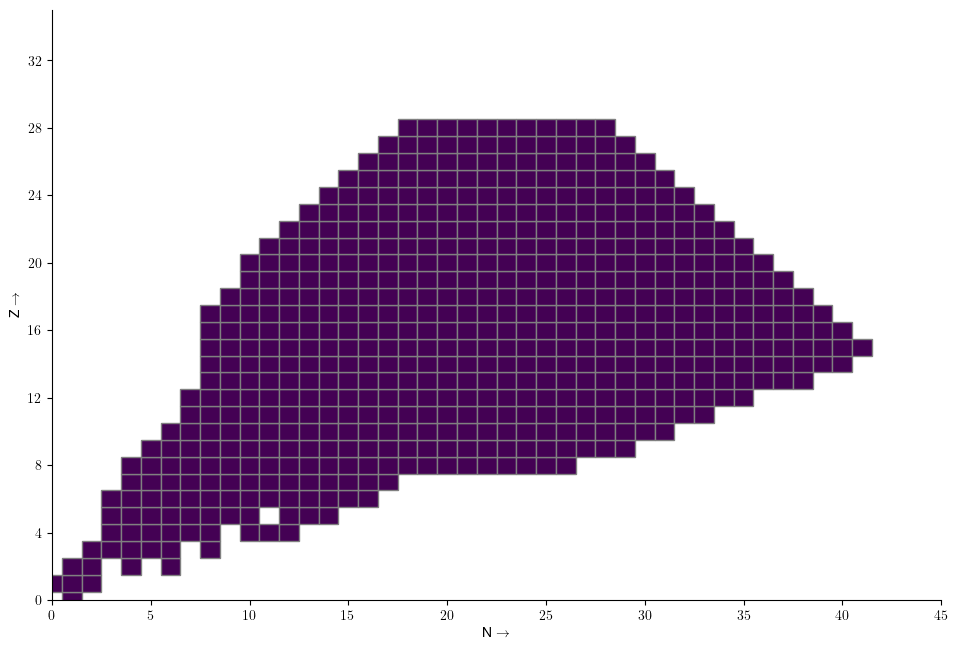

In [49]:
net.gridplot()
plt.xlim(0,45)
plt.ylim(0,35)
plt.tight_layout()
plt.savefig('pool.png', bbox_inches="tight")
#plt.title(r"Available pool of rates")

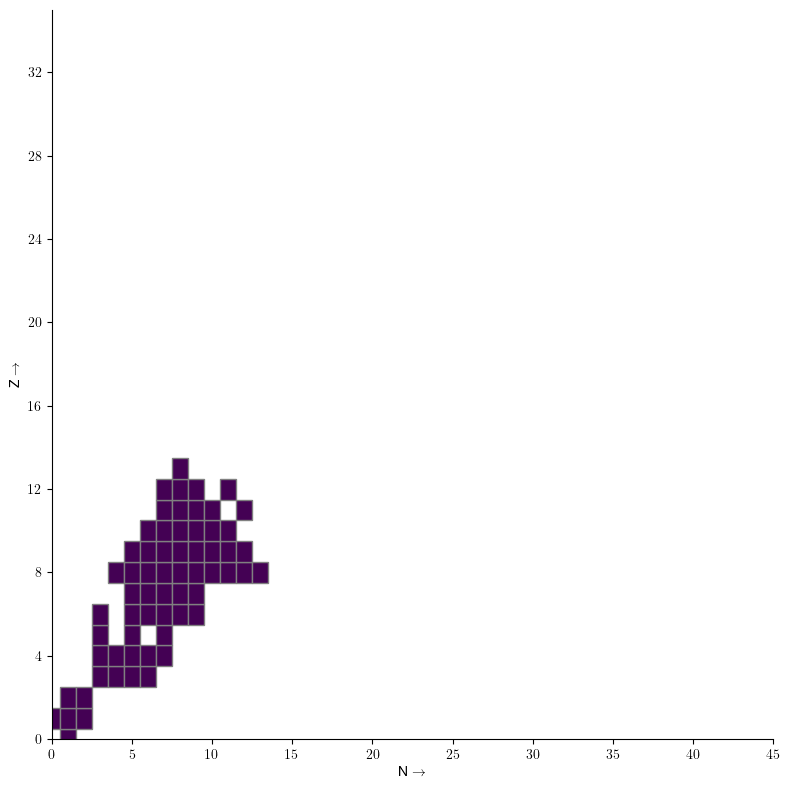

In [50]:
reduced_net.gridplot()
plt.xlim(0,45)
plt.ylim(0,35)
plt.tight_layout()
plt.savefig('reduced.png', bbox_inches="tight")
#plt.title(r"Reduced network")

In [ ]:
print(len(net.get_rates()))
print(len(net.get_nuclei()))

print(len(reduced_net.get_rates()))
print(len(reduced_net.get_nuclei()))

6758
584
507
63
